# TSP
Wygeneruj chmurę n losowych punktów w 2D, a następnie zastosuj algorytm symulowa-  
nego wyżarzania do przybliżonego rozwiązania problemu komiwojażera dla tych punk-  
tów.  
    a) Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości n oraz 3  
    różnych układów punktów w 2D (rozkład jednostajny, rozkład normalny z czterema  
    różnymi grupami parametrów, dziewięć odseparowanych grup punktów).  
    b) Zbadaj wpływ sposobu generacji sąsiedniego stanu (consecutive swap vs. arbitrary  
    swap) oraz funkcji zmiany temperatury na zbieżność procesu optymalizacji.  
    c) Przedstaw wizualizację (saoptimset) działania procedury minimalizującej funkcję  
    celu.  

In [9]:
import random
import math
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt

### Funkcje rysowania wykresów i grafów

In [10]:
def plot_distances(distances):
    plt.plot(distances)
    plt.show()

def plot_points(points):
    plt.scatter([p[0] for p in points], [p[1] for p in points])
    plt.plot([p[0] for p in points], [p[1] for p in points])
    plt.show()

### Funkcje pomocnicze

In [11]:
def accept_prob(old_cost, new_cost, temp):
    if new_cost < old_cost:
        return 1.0
    else:
        return math.exp(-abs((old_cost - new_cost)) / temp)
    
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def total_distance(points):
    return sum([distance(points[i], points[(i+1) % len(points)]) for i in range(len(points))])

### Funkcje zmiany trasy

In [41]:
def consecutive_swap(points):
    new_points = points.copy()
    i = random.randint(0, len(points) - 1)
    j = (i + 1) % len(points)
    new_points[i], new_points[j] = new_points[j], new_points[i]
    return new_points

def arbitrary_swap(points):
    new_points = points.copy()
    i, j = random.sample(range(len(points)), 2)
    new_points[i], new_points[j] = new_points[j], new_points[i]
    return new_points

## Symulowane wyżarzanie

In [49]:
def simulated_annealing(initial_points, swap_function, cooling_rate, 
                        cost_funtion=total_distance, probability_function = accept_prob, T=1000, min_T=1e-3, max_iter=1000):
    points = initial_points.copy()
    candidate_points = points.copy()
    costs = []
    best_solution = points.copy()
    best_cost = cost_funtion(points)

    
    i = 0
    while T > min_T and i < max_iter:
        candidate_points = swap_function(points)
        current_cost = cost_funtion(points)
        new_cost = cost_funtion(candidate_points)

        if probability_function(current_cost, new_cost, T) > random.random():
            points = candidate_points
            if current_cost != new_cost:
                i = 0
            if current_cost < best_cost:
                best_cost = current_cost
                best_solution = points.copy()
        else: i+=1

        costs.append(current_cost)
        T = T * cooling_rate

    return best_solution, costs

### Generatory grafów

In [14]:
def random_points(n):
    return [(random.random()*10, random.random()*10) for _ in range(n)]

def random_4_subclasters(n):
    points = [[(sub[0] + random.random() * 10, sub[1] + random.random() * 10) for _ in range(n//4)] for sub in [(30 * x, 30 * y) for x in range(2) for y in range(2)]]
    points = sum(points, [])
    random.shuffle(points)
    return points

def random_9_subclasters(n):
    points = [[(sub[0] + random.random() * 10, sub[1] + random.random() * 10) for _ in range(n//9)] for sub in [(30 * x, 30 * y) for x in range(3) for y in range(3)]]
    points = sum(points, [])
    random.shuffle(points)
    return points

## Testy

10 punktów, consecutive swap, cooling rate 0.99

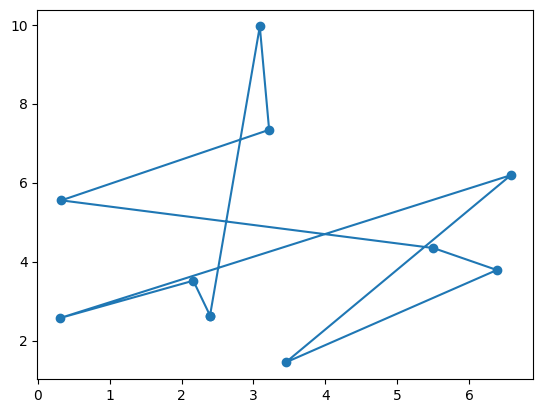

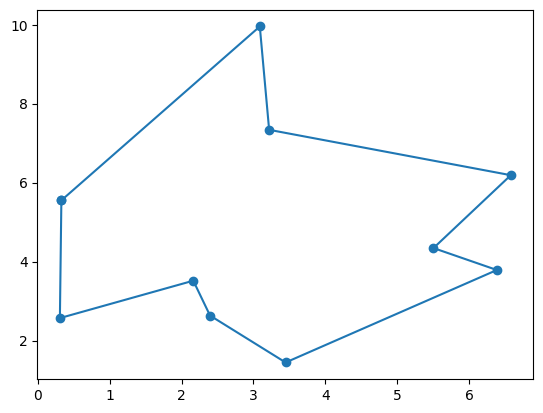

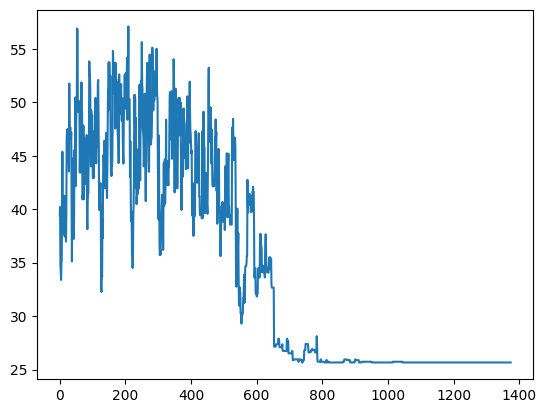

In [53]:
points = random_points(10)
plot_points(points + [points[0]])
solution, costs = simulated_annealing(points, consecutive_swap, 0.99)
solution.append(solution[0])
plot_points(solution)
plot_distances(costs)

10 punktów, arbitrary swap, cooling rate 0.99

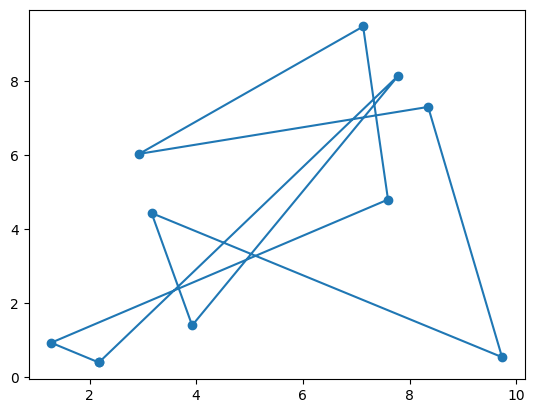

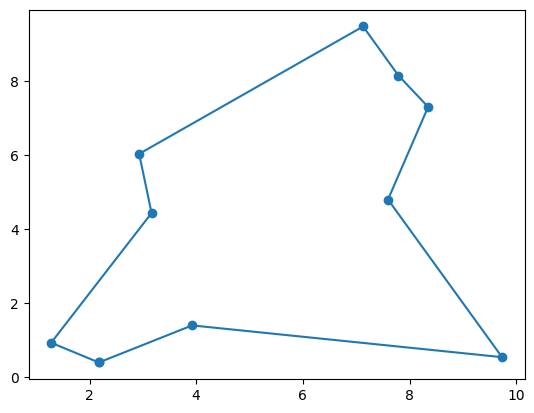

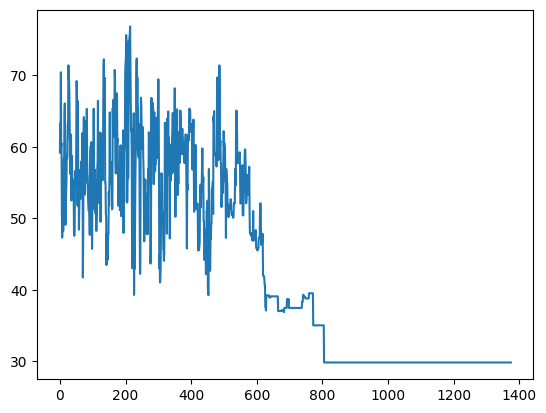

In [54]:
points = random_points(10)
plot_points(points + [points[0]])
solution, costs = simulated_annealing(points, arbitrary_swap, 0.99)
solution.append(solution[0])
plot_points(solution)
plot_distances(costs)

Zarówno arbitrary swap jak i consecutive swap poradziły sobie dosyć dobrze.  
Na obu wykresach widać duże wachanie temperatur.  
Skoki temperatur są spowodowane doborem temperatury początkowej.

100 punktów, consecutive swap, cooling rate 0.999

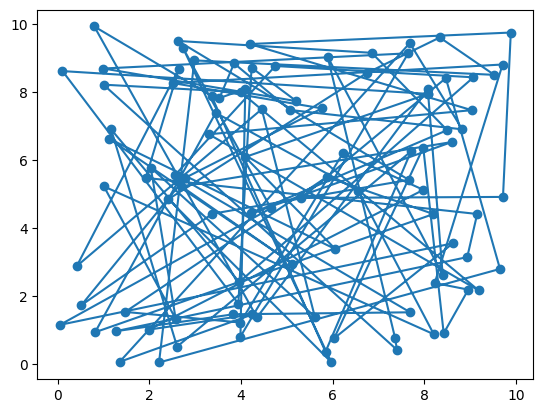

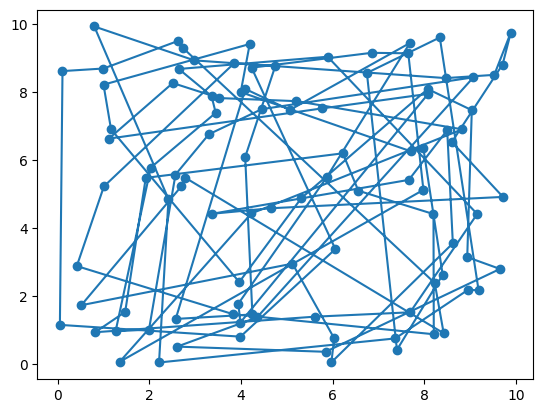

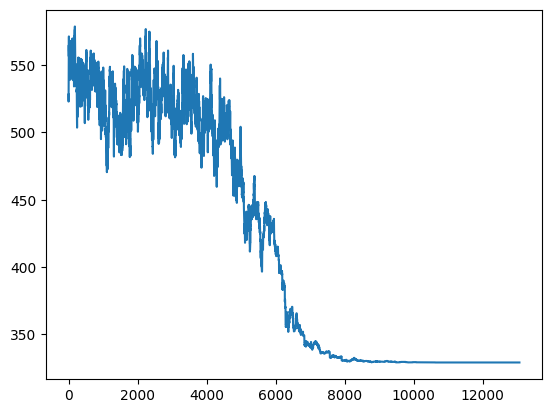

In [55]:
points = random_points(100)
plot_points(points + [points[0]])
solution, costs = simulated_annealing(points, consecutive_swap, 0.999)
solution.append(solution[0])
plot_points(solution)
plot_distances(costs)

100 punktów, arbitrary swap, cooling rate 0.999

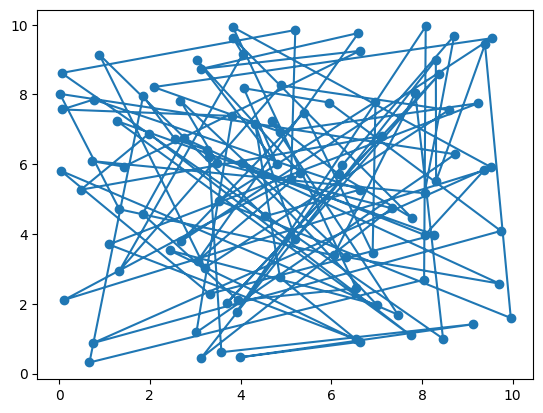

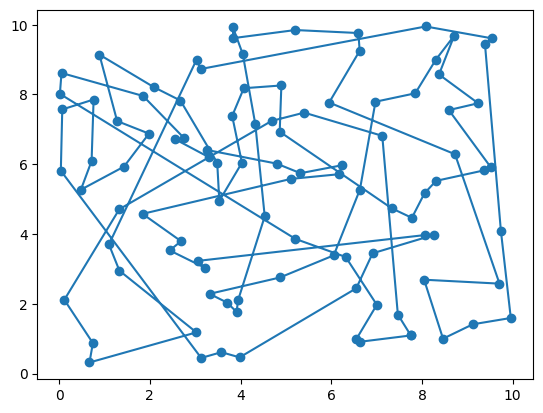

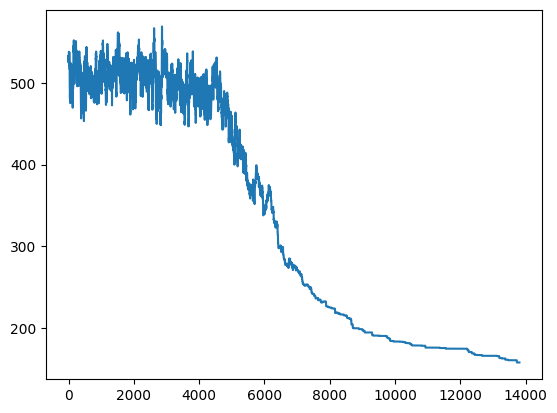

In [56]:
points = random_points(100)
plot_points(points + [points[0]])
solution, costs = simulated_annealing(points, arbitrary_swap, 0.999)
solution.append(solution[0])
plot_points(solution)
plot_distances(costs)

Widać wyraźną przewagę arbitrary swap

4 grupy po 10 elementów, consecutive change, cooling rate 0.999

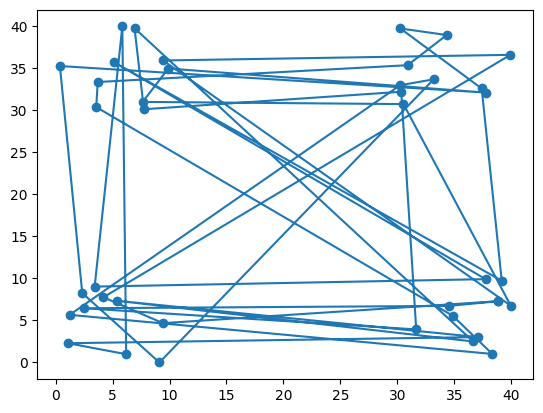

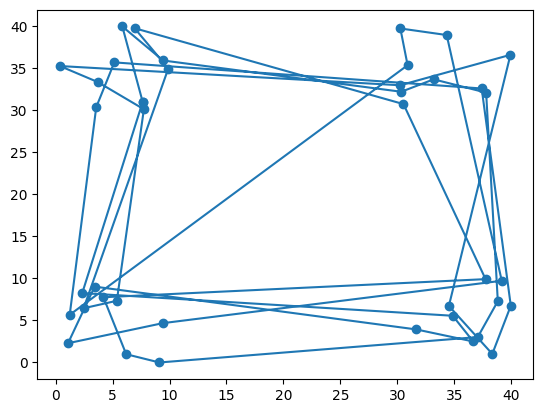

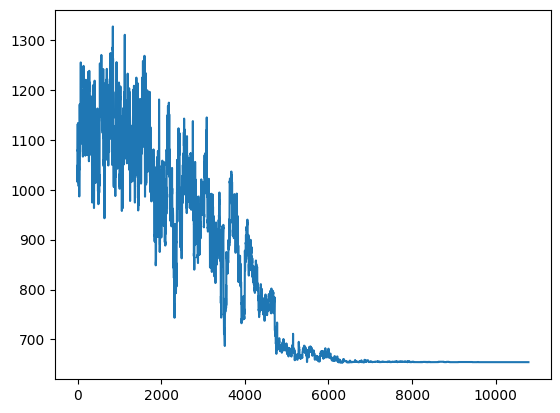

In [57]:
points = random_4_subclasters(40)
plot_points(points + [points[0]])
solution, costs = simulated_annealing(points, consecutive_swap, 0.999)
solution.append(solution[0])
plot_points(solution)
plot_distances(costs)

4 grupy po 10 elementów, arbitrary swap, cooling rate 0.999

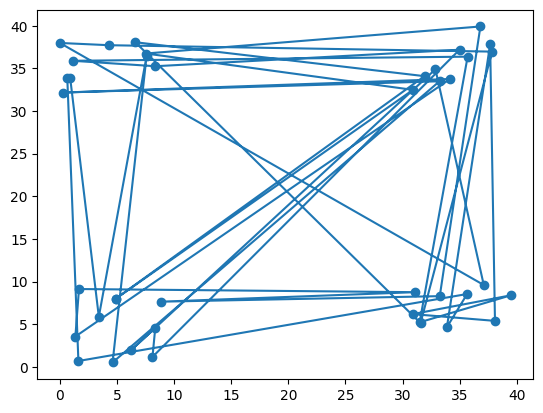

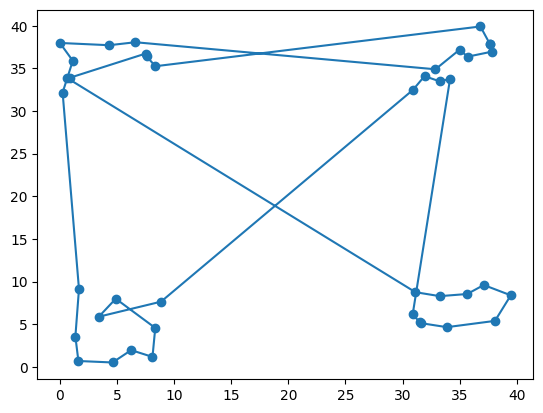

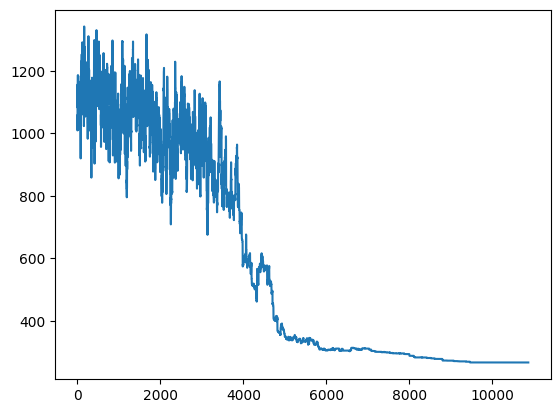

In [65]:
points = random_4_subclasters(40)
plot_points(points + [points[0]])
solution, costs = simulated_annealing(points, arbitrary_swap, 0.999)
solution.append(solution[0])
plot_points(solution)
plot_distances(costs)

Wyraźna przewaga arbitrary swap

9 grup po 10 elementów, consecutive swap, cooling rate 0.9999

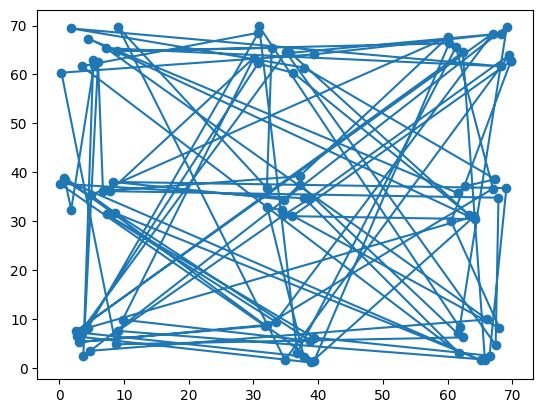

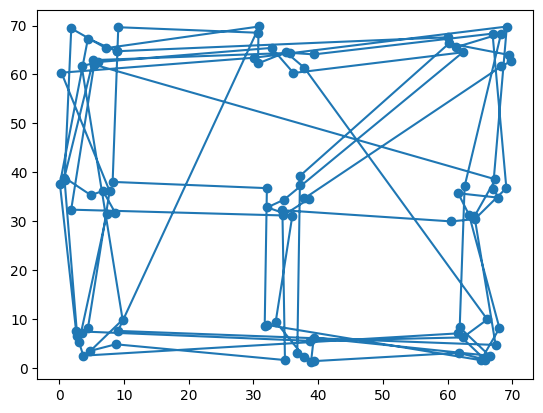

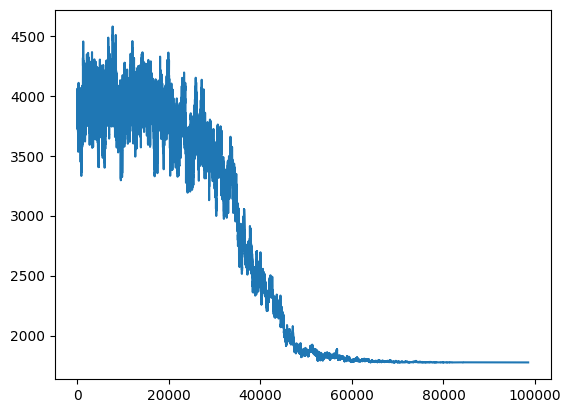

In [68]:
points = random_9_subclasters(90)
plot_points(points + [points[0]])
solution, costs = simulated_annealing(points, consecutive_swap, 0.9999)
solution.append(solution[0])
plot_points(solution)
plot_distances(costs)

9 grup po 10 punktów, arbitrary swap, cooling rate 0.9999

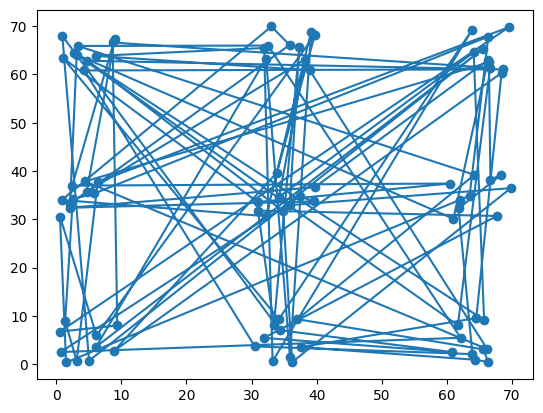

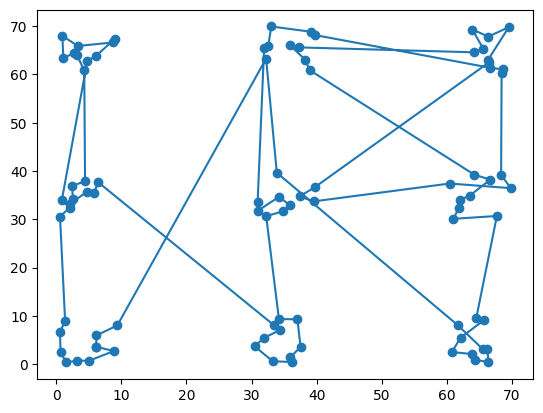

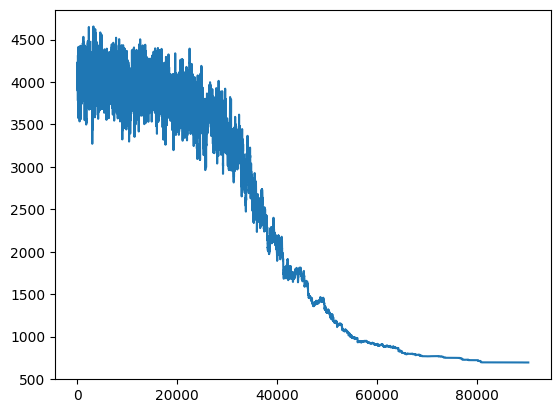

In [67]:
points = random_9_subclasters(90)
plot_points(points + [points[0]])
solution, costs = simulated_annealing(points, arbitrary_swap, 0.9999)
solution.append(solution[0])
plot_points(solution)
plot_distances(costs)

## Podsumowanie
Można zauważyć że dla małej ilości punktów różnica pomiędzy arbitrary a consecutive swap  
jest niewielka. Jednak dla dużej ilości punktów lub punktów rozłożonych nieregularnie  
arbitrary swap jest dużo lepszy.